In [17]:
from typing import (List, Tuple)

import pennylane as qml
from pennylane import numpy as np
from pennylane import PauliX, PauliY, PauliZ

import matplotlib.pyplot as plt

from problems.vqls import *

In [18]:
# Here, we set the main hyper-parameters of the model

# Main variable parameters
n_qubits = 4
steps = 1
eta = 0.99
layers = 2
q_delta = 0.001
err_tol = 10**-8

# These parameters affect the Ising model system
# Fixed in paper
J = 0.1
# Need to choose correct values
zeta = 8.1
eta_ising = 4.1


n_shots = 10**7
tot_qubits = n_qubits + 1
ancilla_idx = n_qubits

# Works for simplified 2-design (odd or even number of qubits)
n_parameters = n_qubits + layers*(2*n_qubits - 2)
rng_seed = 0

In [19]:
init_weights, weights, w = generate_weights(n_qubits, layers, q_delta)

def variational_block(init_weights, weights):
    #for idx in range(n_qubits):
    #    qml.Hadamard(wires=idx)
    qml.templates.SimplifiedTwoDesign(initial_layer_weights=init_weights, weights=weights, wires=range(n_qubits))

drawer = qml.draw(variational_block)
print(drawer(init_weights=init_weights, weights=weights))


0: ─╭SimplifiedTwoDesign─┤  
1: ─├SimplifiedTwoDesign─┤  
2: ─├SimplifiedTwoDesign─┤  
3: ─╰SimplifiedTwoDesign─┤  


In [20]:
# Coefficients of the linear combination A = c_0 A_0 + c_1 A_1 ...
'''
c = np.array([1.0, 0.2, 0.2])

A_terms = ["III", "XZI", "XII"]
A_mat = A_to_num(n_qubits, c, A_terms)
A_norm = np.linalg.norm(A_mat)
print(A_norm)

c = c / A_norm
norm_A_mat = A_to_num(n_qubits, c, A_terms)


print(np.linalg.norm(norm_A_mat))


'''

c, A_terms = A_Ising_num(n_qubits, zeta, eta_ising, J)

A_mat = A_to_num(n_qubits, c, A_terms)
print(np.linalg.norm(A_mat, ord = 2))
print(np.sort(np.linalg.eigvals(A_mat)))

A_norm = np.linalg.norm(A_mat, ord = 2)
c = np.array(c)
c /= A_norm

norm_A_mat = A_to_num(n_qubits, c, A_terms)
print(np.linalg.norm(norm_A_mat))
        

# def variational_block(weights):
#     #Variational circuit mapping the ground state |0> to the ansatz state |x>.
    
#     #for idx in range(n_qubits):
#     #    qml.Hadamard(wires=idx)

#     for idx, element in enumerate(weights):
#         if idx > 3:
#             break
#         qml.RY(element, wires=idx)

#     #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 3:
#             continue
#         if idx > 7:
#             break
#         qml.RY(element, wires=idx%4)
        
#     qml.CZ(wires=(1, 2))
    
#     for idx, element in enumerate(weights):
#         if idx <= 7:
#             continue
#         if idx == 8:
#             continue
#         if idx == 11:
#             continue
#         if idx > 11:
#             break
#         qml.RY(element, wires = idx%4)

    
#     #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 11:
#             continue
#         if idx > 15:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 15:
#             continue
#         if ((idx == 16) or (idx == 19)):
#             continue
#         if idx > 19:
#             break
#         qml.RY(element, wires = idx%4)
    
        
    
#     #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 19:
#             continue
#         if idx > 23:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 23:
#             continue
#         if ((idx == 24) or (idx == 27)):
#             continue
#         if idx > 27:
#             break
#         qml.RY(element, wires = idx%4)
    


#     #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 27:
#             continue
#         if idx > 31:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 31:
#             continue
#         if ((idx == 32) or (idx == 35)):
#             continue
#         if idx > 35:
#             break
#         qml.RY(element, wires = idx%4)


#     #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 35:
#             continue
#         if idx > 39:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 39:
#             continue
#         if ((idx == 40) or (idx == 43)):
#             continue
#         if idx > 43:
#             break
#         qml.RY(element, wires = idx%4)

#         #
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 43:
#             continue
#         if idx > 47:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 47:
#             continue
#         if ((idx == 48) or (idx == 51)):
#             continue
#         if idx > 51:
#             break
#         qml.RY(element, wires = idx%4)

#     #
    
#     qml.CZ(wires=(0, 1))
#     qml.CZ(wires=(2, 3))

#     for idx, element in enumerate(weights):
#         if idx <= 51:
#             continue
#         if idx > 55:
#             break
#         qml.RY(element, wires=idx%4)

#     qml.CZ(wires=(1, 2))

#     for idx, element in enumerate(weights):
#         if idx <= 55:
#             continue
#         if ((idx == 56) or (idx == 59)):
#             continue
#         if idx > 59:
#             break
#         qml.RY(element, wires = idx%4)
    








def U_b():
    """Unitary matrix rotating the ground state to the problem vector |b> = U_b |0>."""
    for idx in range(n_qubits):
        qml.Hadamard(wires=idx)



np.random.seed(rng_seed)
w = q_delta * np.random.randn(7*n_qubits, requires_grad=True)
# w = range(15*n_qubits)

# drawer = qml.draw(variational_block)
# print(drawer(w))

A_num = A_to_num(n_qubits, c, A_terms)
print(np.real(A_num))

condition_number = np.linalg.norm(A_num) * np.linalg.norm(np.linalg.inv(A_num))
print(condition_number)

1.0009261
[0.01141955+0.j 0.23862471+0.j 0.25138402+0.j 0.26662201+0.j
 0.27855405+0.j 0.47858915+0.j 0.49382716+0.j 0.50575918+0.j
 0.50658649+0.j 0.51851851+0.j 0.53375649+0.j 0.73379165+0.j
 0.74572366+0.j 0.76096165+0.j 0.77372098+0.j 1.00092614+0.j]
2.252277
[[0.54270715 0.12334256 0.12334256 0.         0.12334256 0.
  0.         0.         0.12334256 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.12334256 0.51803869 0.         0.12334256 0.         0.12334256
  0.         0.         0.         0.12334256 0.         0.
  0.         0.         0.         0.        ]
 [0.12334256 0.         0.49337021 0.12334256 0.         0.
  0.12334256 0.         0.         0.         0.12334256 0.
  0.         0.         0.         0.        ]
 [0.         0.12334256 0.12334256 0.51803869 0.         0.
  0.         0.12334256 0.         0.         0.         0.12334256
  0.         0.         0.         0.        ]
 [0.12334256 0.         0.         0.         0.4933

In [21]:
dev_mu = qml.device("default.qubit", wires=tot_qubits)

@qml.qnode(dev_mu, interface="autograd")
def local_hadamard_test(init_weights, weights, l=None, lp=None, j=None, part=None):

    
    # First Hadamard gate applied to the ancillary qubit.
    qml.Hadamard(wires=ancilla_idx)

    # For estimating the imaginary part of the coefficient "mu", we must add a "-i"
    # phase gate.
    if part == "Im" or part == "im":
        qml.PhaseShift(-np.pi / 2, wires=ancilla_idx)

    # Variational circuit generating a guess for the solution vector |x>
    variational_block(init_weights, weights)

    # Controlled application of the unitary component A_l of the problem matrix A.
    A_to_code(idx = l, ancilla_idx= ancilla_idx, terms = A_terms)

    # Adjoint of the unitary U_b associated to the problem vector |b>.
    # In this specific example Adjoint(U_b) = U_b.
    U_b()

    # Controlled Z operator at position j. If j = -1, apply the identity.
    if j != -1:
        qml.CZ(wires=[ancilla_idx, j])

    # Unitary U_b associated to the problem vector |b>.
    U_b()

    # Controlled application of Adjoint(A_lp).
    # In this specific example Adjoint(A_lp) = A_lp.
    A_to_code(idx= lp, ancilla_idx= ancilla_idx, terms= A_terms)

    # Second Hadamard gate applied to the ancillary qubit.
    qml.Hadamard(wires=ancilla_idx)

    # Expectation value of Z for the ancillary qubit.
    return qml.expval(qml.PauliZ(wires=ancilla_idx))

def mu(init_weights, weights, l=None, lp=None, j=None):
    """Generates the coefficients to compute the "local" cost function C_L."""

    mu_real = local_hadamard_test(init_weights, weights, l=l, lp=lp, j=j, part="Re")
    mu_imag = local_hadamard_test(init_weights, weights, l=l, lp=lp, j=j, part="Im")

    return mu_real + 1.0j * mu_imag

def psi_norm(init_weights, weights):
    """Returns the normalization constant <psi|psi>, where |psi> = A |x>."""
    norm = 0.0

    for l in range(0, len(c)):
        for lp in range(0, len(c)):
            norm = norm + c[l] * np.conj(c[lp]) * mu(init_weights, weights, l, lp, -1)

    return abs(norm)


def cost_loc(w):
    init_weights, weights = reshape_weights(n_qubits, n_parameters, layers, w)

    """Local version of the cost function. Tends to zero when A|x> is proportional to |b>."""
    mu_sum = 0.0

    for l in range(0, len(c)):
        for lp in range(0, len(c)):
            for j in range(0, n_qubits):
                mu_sum = mu_sum + c[l] * np.conj(c[lp]) * mu(init_weights, weights, l, lp, j)

    mu_sum = abs(mu_sum)

    # Cost function C_L
    return 0.5 - 0.5 * mu_sum / (n_qubits * psi_norm(init_weights, weights))

In [22]:
opt = qml.GradientDescentOptimizer(eta)
#opt = qml.AdamOptimizer(stepsize=0.15, beta1 = 0.8)
#opt = qml.QNGOptimizer(eta, qml.metric_tensor(cost_loc, metric_tensor_fn = metric_fn))


#grad_vals = []
cost_history = []
w_history = []
for it in range(steps):
    if (cost_loc(w) < err_tol):
        break
    #cost_grad = qml.grad(cost_loc, argnum=0)(w)[0]
    w, cost = opt.step_and_cost(cost_loc, w)

    
    #print("Step {:3d}       Cost_L = {:9.7f}        Cost_Grad = {:9.9f}".format(it, cost, cost_grad))
    print("Step {:3d}       Cost_L = {:9.9f}".format(it, cost))
    cost_history.append(cost)
    w_history.append(w)
    #grad_vals.append(cost_grad)

#print(np.var(grad_vals))

Step   0       Cost_L = 0.310775244


/var/folders/46/x_y_zr5s2rj1v37fwfjmjh9r0000gn/T/ipykernel_92896/1714839985.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


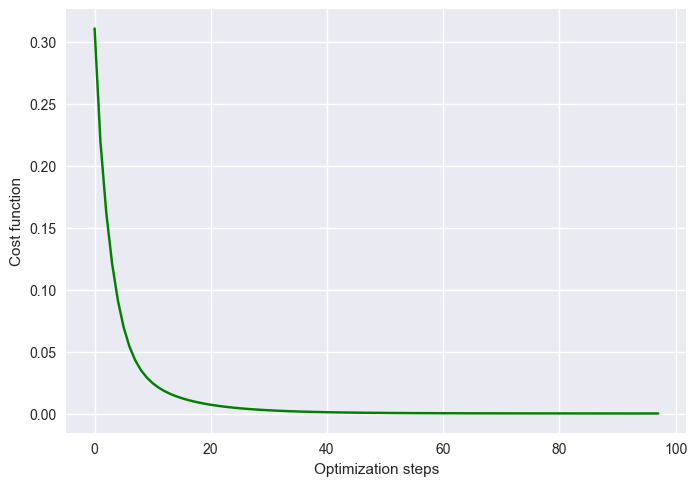

In [11]:
plt.style.use("seaborn")
plt.plot(cost_history, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()

In [12]:


b_num = b_to_num()
print(b_num)
print(np.linalg.norm(b_num))

[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
0.9999999999999997


In [13]:
A_inv = np.linalg.inv(A_num)
x = np.dot(A_inv, b_num)

c_probs = np.real((x / np.linalg.norm(x)) ** 2)

In [14]:
dev_x = qml.device("default.qubit", wires = n_qubits, shots = n_shots)

@qml.qnode(dev_x, interface="autograd")
def prepare_and_sample(w):
    init_weights, weights = reshape_weights(n_qubits, n_parameters, layers, w)
    
    # Variational circuit generating a guess for the solution vector |x>
    variational_block(init_weights, weights)
    # We assume that the system is measured in the computational basis.
    # then sampling the device will give us a value of 0 or 1 for each qubit (n_qubits)
    # this will be repeated for the total number of shots provided (n_shots)
    return qml.sample()

raw_samples = prepare_and_sample(w)

# convert the raw samples (bit strings) into integers and count them
samples = []

for sam in raw_samples:
    samples.append(int("".join(str(bs) for bs in sam), base = 2))

q_probs = np.bincount(samples) / n_shots

In [15]:
print("x_n^2 = \n", c_probs)

print("|<x|n>|^2 = \n", q_probs)

x_n^2 = 
 [0.05950756 0.0531261  0.05857153 0.06530985 0.05857153 0.07978315
 0.07200416 0.0531261  0.0531261  0.07200416 0.07978315 0.05857153
 0.06530985 0.05857153 0.0531261  0.05950756]
|<x|n>|^2 = 
 [0.0571709 0.0574228 0.0593899 0.0629328 0.0593758 0.0741999 0.0742425
 0.0545867 0.0574459 0.0611111 0.0743729 0.0723835 0.0631711 0.0720293
 0.0546018 0.0455631]


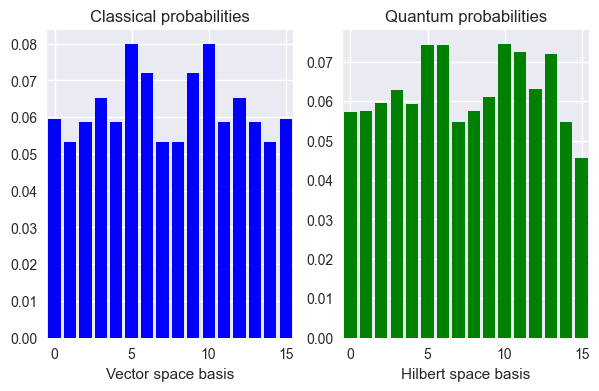

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(0, 2 ** n_qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")

ax2.bar(np.arange(0, 2 ** n_qubits), q_probs, color="green")
ax2.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")

plt.show()